In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('network_activity.csv')

In [ ]:
data.head()

,Timestamp,Source IP,Destination IP,Hostname,Protocol,Port
0,2025-10-15 11:47:00,156.143.59.156,35.186.224.30,30.224.186.35.bc.googleusercontent.com,TCP,443.0
1,2025-10-15 11:47:00,156.143.59.156,10.102.8.98,shrek19.fu.campus,UDP,53.0
2,2025-10-15 11:47:00,10.102.8.98,156.143.59.156,Unknown,UDP,54244.0
3,2025-10-15 11:47:00,156.143.59.156,10.102.8.98,shrek19.fu.campus,UDP,53.0
4,2025-10-15 11:47:00,10.102.8.98,156.143.59.156,Unknown,UDP,52084.0


In [ ]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['hour'] = data['Timestamp'].dt.hour

Text(0, 0.5, 'Number of Packets')

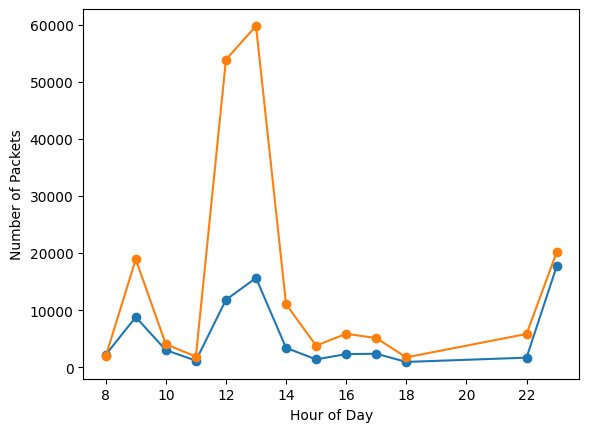

In [6]:
udp = data[data['Protocol'] == 'UDP']
tcp = data[data['Protocol'] == 'TCP']


udp_hourly_counts = udp.groupby('hour').size()
tcp_hourly_counts = tcp.groupby('hour').size()

plt.plot(udp_hourly_counts.index, udp_hourly_counts.values, label='UDP', marker='o')
plt.plot(tcp_hourly_counts.index, tcp_hourly_counts.values, label='TCP', marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Packets')

In [13]:
data['Source IP'].value_counts()[:20]
data['Destination IP'].value_counts()[:20]

Destination IP
156.143.59.156     78850
11.34.57.134       61638
160.79.104.10      10332
35.186.224.9        8610
34.36.57.103        7103
10.102.8.98         5274
255.255.255.255     5086
35.186.224.24       4806
11.34.57.129        4298
104.18.41.41        4277
35.186.224.30       3485
224.0.0.251         3316
17.248.136.168      2972
172.64.155.209      2681
13.107.5.93         2322
17.248.200.68       1915
17.57.144.42        1724
34.158.255.62       1441
239.255.255.250     1389
52.96.179.114       1150
Name: count, dtype: int64

In [10]:
data['Hostname'].value_counts()[:20]

Hostname
Unknown                                                 202528
9.224.186.35.bc.googleusercontent.com                     8557
103.57.36.34.bc.googleusercontent.com                     7064
broadcasthost                                             5086
shrek19.fu.campus                                         4831
24.224.186.35.bc.googleusercontent.com                    4777
30.224.186.35.bc.googleusercontent.com                    3382
mdns.mcast.net                                            3084
62.255.158.34.bc.googleusercontent.com                    1429
a23-4-43-182.deploy.static.akamaitechnologies.com         1116
yr-in-f207.1e100.net                                       992
dns.google                                                 964
a104-110-139-90.deploy.static.akamaitechnologies.com       888
usatl4-edge-get-006.b.aaplimg.com                          675
yx-in-f103.1e100.net                                       654
a23-48-246-132.deploy.static.akamaitechnologie

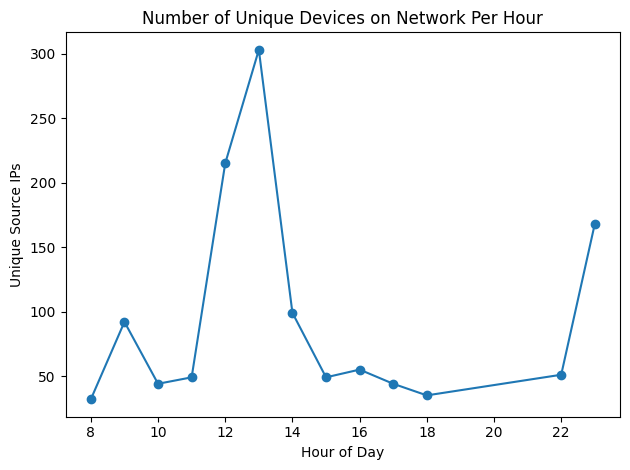

In [16]:
# Count unique Source IPs per hour
unique_ips_per_hour = data.groupby('hour')['Source IP'].nunique()

plt.plot(unique_ips_per_hour.index, unique_ips_per_hour.values, marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Unique Source IPs')
plt.title('Number of Unique Devices on Network Per Hour')
plt.tight_layout()
plt.show()

In [17]:
import pandas as pd

unique_sources = data['src_ip'].nunique()
print(f"Unique source IPs: {unique_sources}")
print(data['src_ip'].value_counts())

KeyError: 'src_ip'